<a href="https://colab.research.google.com/github/sonali11patel/numpy/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

In [ ]:
# Q. Write a Python script to identify unique values in a list and count their occurrences.
#    This tests your understanding of sets and dictionaries.

mylist=[1,1,2,2,3,4,5,6,6,7]
print(mylist)
myuniquelist=list(set(mylist))
print(myuniquelist)
mydict={i:mylist.count(i) for i in myuniquelist}
print(mydict)

[1, 1, 2, 2, 3, 4, 5, 6, 6, 7]
[1, 2, 3, 4, 5, 6, 7]
{1: 2, 2: 2, 3: 1, 4: 1, 5: 1, 6: 2, 7: 1}


In [ ]:
# Q. How would you use pandas to merge two datasets and calculate total sales for products with valid promotions?
#    This involves merge(), groupby(), and basic data analysis functions.

df1=pd.DataFrame({'name':['sonali', 'nauvashini', 'Emma', 'Rachel'],
         'marks': [20,10,50,30],
         'section': ['a','c','d','b']})
df2=pd.DataFrame({'name':['sonali', 'nauvashini', 'Emma', 'Rachel'],
         'city': ['jsg','smb','del','mumb'],
         'state': ['od','od','dl','ma']})
df3=pd.merge(df1,df2,on='name',how='inner')
print(sorted(df3.keys()))
#df3.pop('section')
print(df3.values)
print(sorted(df3.items()))
print(df3.sort_values('city'))
#df3.groupby('name',as_index=False)['marks'].sum()
#print(df3)

['city', 'marks', 'name', 'section', 'state']
[['sonali' 20 'a' 'jsg' 'od']
 ['nauvashini' 10 'c' 'smb' 'od']
 ['Emma' 50 'd' 'del' 'dl']
 ['Rachel' 30 'b' 'mumb' 'ma']]
[('city', 0     jsg
1     smb
2     del
3    mumb
Name: city, dtype: object), ('marks', 0    20
1    10
2    50
3    30
Name: marks, dtype: int64), ('name', 0        sonali
1    nauvashini
2          Emma
3        Rachel
Name: name, dtype: object), ('section', 0    a
1    c
2    d
3    b
Name: section, dtype: object), ('state', 0    od
1    od
2    dl
3    ma
Name: state, dtype: object)]
         name  marks section  city state
2        Emma     50       d   del    dl
0      sonali     20       a   jsg    od
3      Rachel     30       b  mumb    ma
1  nauvashini     10       c   smb    od


In [ ]:
# Q. Explain the differences between lists, tuples, sets, and dictionaries in Python,
# highlighting their use cases in data manipulation and analysis.



In [ ]:
df3

,name,marks,section,city,state
0,sonali,20,a,jsg,od
1,nauvashini,10,c,smb,od
2,Emma,50,d,del,dl
3,Rachel,30,b,mumb,ma


The iloc() function is an indexed-based selecting method which means that we have to pass an integer index in the method to select a specific row/column.
This method does not include the last element of the range passed in it unlike loc().
The loc() function is label based data selecting method which means that we have to pass the name of the row or column which we want to select.
This method includes the last element of the range passed in it, unlike iloc(). loc() can accept the boolean data unlike iloc().

In [ ]:
print(df3.loc[(df3.marks > 25)&(df3.city=='del')])

print(df3.iloc[0])
print(df3.loc[0])

   name  marks section city state
2  Emma     50       d  del    dl
name       sonali
marks          20
section         a
city          jsg
state          od
Name: 0, dtype: object
name       sonali
marks          20
section         a
city          jsg
state          od
Name: 0, dtype: object


In [ ]:
mydict.items()
for i,j in mydict.items():
  if mydict[j]<2:
    print(i)
    print(j)

In [ ]:
df3.describe()
for i,j in df3.items():
  print(i)
  print(j)
print(type(df3.values))

name
0        sonali
1    nauvashini
2          Emma
3        Rachel
Name: name, dtype: object
marks
0    20
1    10
2    50
3    30
Name: marks, dtype: int64
section
0    a
1    c
2    d
3    b
Name: section, dtype: object
city
0     jsg
1     smb
2     del
3    mumb
Name: city, dtype: object
state
0    od
1    od
2    dl
3    ma
Name: state, dtype: object
<class 'numpy.ndarray'>


In [ ]:
# Map, reduce, filter

mylist=[1,2,3,3,4,4,5,6,7]
uniquelist=list(set(mylist))
countlist=list(map(lambda x:mylist.count(x) ,mylist))
print(countlist)
uniquelistelements=list(filter(lambda x:x>1, countlist))
print(uniquelistelements)

from functools import reduce
sum=reduce(lambda x,y:x+y,uniquelist)
sum

[1, 1, 2, 2, 2, 2, 1, 1, 1]
[2, 2, 2, 2]


28

In [ ]:
newdf=pd.read_csv('https://raw.githubusercontent.com/bvalgard/data/main/titanic.csv')
newdf.keys()

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [ ]:
newdf.iloc[0:1,[0,4]]
#newdf.iloc[0:5,0:5]

,pclass,age
0,1,29


In [ ]:
newdf.loc[0:1,['pclass','name']]

,pclass,name
0,1,"Allen, Miss. Elisabeth Walton"
1,1,"Allison, Master. Hudson Trevor"


In [ ]:
newdf.groupby(['pclass','sex'], as_index=False)[['survived','fare']].sum()

,pclass,sex,survived,fare
0,1,female,139,211.3375151.55151.5577.958351.4792227.52569.37...
1,1,male,61,151.55151.5526.55049.5042227.5253025.925247.52...
2,2,female,94,24261326393939131339392613132921262630302626.2...
3,2,male,25,241311.510.5261311.510.510.512.525262639131313...
4,3,female,106,20.257.657.22929.4759.357.854231.27531.2757.92...
5,3,male,75,7.5520.2520.257.657.9257.258.059.3518.78757.88...


In [ ]:
newdf.groupby(['pclass','sex'], as_index=False)[['survived','fare']].agg(['sum','max'])

pclass     sex survived      \
                      sum max   
0      1  female      139   1   
1      1    male       61   1   
2      2  female       94   1   
3      2    male       25   1   
4      3  female      106   1   
5      3    male       75   1   

                                                fare          
                                                 sum     max  
0  211.3375151.55151.5577.958351.4792227.52569.37...    93.5  
1  151.55151.5526.55049.5042227.5253025.925247.52...    93.5  
2  24261326393939131339392613132921262630302626.2...      65  
3  241311.510.5261311.510.510.512.525262639131313...  9.6875  
4  20.257.657.22929.4759.357.854231.27531.2757.92...  9.8417  
5  7.5520.2520.257.657.9257.258.059.3518.78757.88...       ?

In [ ]:
newdf.loc[newdf['pclass']==1,'fare']

,fare
0,211.3375
1,151.55
2,151.55
3,151.55
4,151.55
...,...
318,35
319,134.5
320,35.5
321,26.55


In [ ]:
print(newdf.dtypes)

pclass        int64
survived      int64
name         object
sex          object
age          object
sibsp         int64
parch         int64
ticket       object
fare         object
cabin        object
embarked     object
boat         object
body         object
home.dest    object
dtype: object


In [ ]:
print(type(df3.keys()))
list_=[df3.keys()]
print(type(list(df3.keys())))

<class 'pandas.core.indexes.base.Index'>
<class 'list'>


In [ ]:
x = np.random.uniform(0,1,10)
y = 2*x+2+np.random.normal(0,0.1,10)
print(x)
print(y)
print(np.mean(x),np.average(x),np.std(x))

[0.38950124 0.5791583  0.06295979 0.89549415 0.57973725 0.34376649
 0.02079545 0.03346438 0.957033   0.79007396]
[2.77785468 3.31946668 2.12990439 3.83028134 3.01845865 2.68361647
 2.13105045 2.24141427 3.89623821 3.68683468]
0.4651984018248969 0.4651984018248969 0.33539018338369275


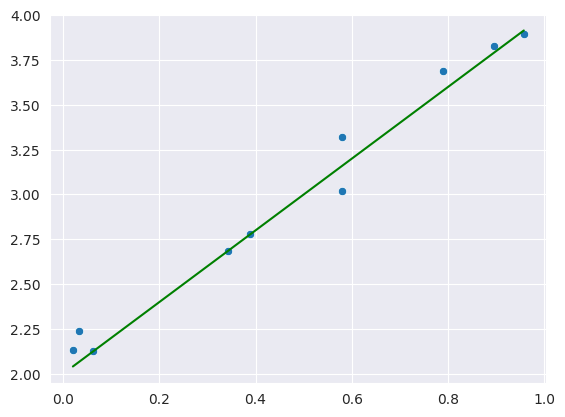

In [ ]:
_=sns.scatterplot(x=x,y=y)
_=sns.lineplot(x=x,y=2*x+2,color='green')

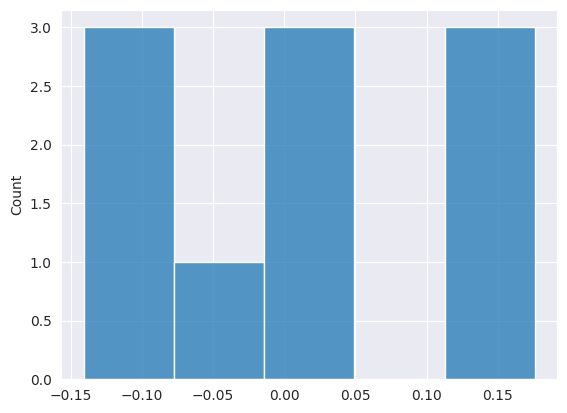

In [ ]:
_=sns.histplot(np.random.normal(0,0.1,10))

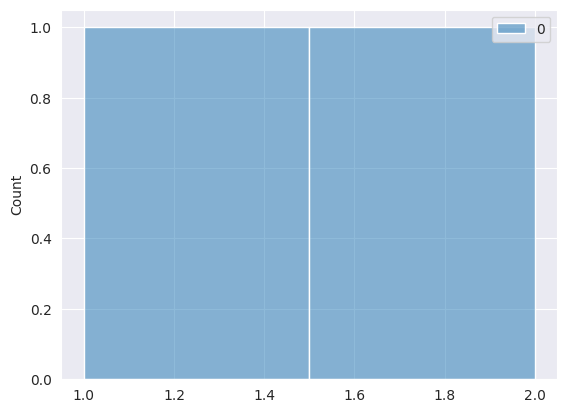

In [ ]:
_=sns.histplot(y)

In [ ]:
x=np.array([[2],[5]])
print(x)
y=np.array([[1],[2]])
print(y)
beta=np.array([[2]])

[[2]
 [5]]
[[1]
 [2]]


In [ ]:
y_pred=np.dot(x,beta)
np.sum((y_pred-y)**2)

NameError: name 'beta' is not defined

In [ ]:
my_dict = {i:1+7 for i in range(1, 10)}
my_dict

{1: 8, 2: 8, 3: 8, 4: 8, 5: 8, 6: 8, 7: 8, 8: 8, 9: 8}